# Training participation

### Import data from .xls spreadsheet

In [2]:
import pandas as pd

In [4]:
file = 'training.xls'

xl = pd.ExcelFile(file)
training = xl.parse('training')

### Data inspection

In [7]:
print(training.head())

       date  day_counter  white  yellow  orange  green  blue  brown  black  \
0  20130411            1      4       2       0      3     2      2      4   
1  20130418            8      3       1       0      1     2      3      3   
2  20130425           15      3       1       0      1     1      4      3   
3  20130502           22      5       2       0      2     2      3      4   
4  20130516           36      4       2       0      2     4      3      2   

   day_of_the_year  year  month  day      date2  total  weekday  label  
0              101     0      4   11 2013-04-11     17        0      1  
1              108     0      4   18 2013-04-18     13        0      1  
2              115     0      4   25 2013-04-25     13        0      1  
3              122     0      5    2 2013-05-02     18        0      1  
4              136     0      5   16 2013-05-16     17        0      1  


In [8]:
training_summary = training.describe()
print(training_summary)

               date  day_counter       white      yellow      orange  \
count  2.380000e+02   238.000000  238.000000  238.000000  238.000000   
mean   2.016223e+07  1226.294118    1.647059    0.794118    0.668067   
std    1.694061e+04   614.151157    1.596876    0.839207    0.858753   
min    2.013041e+07     1.000000    0.000000    0.000000    0.000000   
25%    2.015031e+07   702.750000    0.000000    0.000000    0.000000   
50%    2.017017e+07  1392.500000    1.000000    1.000000    0.000000   
75%    2.018011e+07  1733.000000    2.000000    1.000000    1.000000   
max    2.019021e+07  2129.000000   11.000000    3.000000    4.000000   

            green        blue       brown       black  day_of_the_year   year  \
count  238.000000  238.000000  238.000000  238.000000       238.000000  238.0   
mean     0.651261    1.424370    2.197479    4.025210       172.491597    0.0   
std      0.763223    1.023229    1.242222    1.542436       109.064868    0.0   
min      0.000000    0.0000

In [42]:
data = training[["white", "yellow", "orange", "green", "blue", "brown", "black", "total", "label"]] 
features = training[["white", "yellow", "orange", "green", "blue", "brown", "black", "total"]] 
labels = training["label"]

In [43]:
print(data.head())
print(features.head())
print(labels.head())

   white  yellow  orange  green  blue  brown  black  total  label
0      4       2       0      3     2      2      4     17      1
1      3       1       0      1     2      3      3     13      1
2      3       1       0      1     1      4      3     13      1
3      5       2       0      2     2      3      4     18      1
4      4       2       0      2     4      3      2     17      1
   white  yellow  orange  green  blue  brown  black  total
0      4       2       0      3     2      2      4     17
1      3       1       0      1     2      3      3     13
2      3       1       0      1     1      4      3     13
3      5       2       0      2     2      3      4     18
4      4       2       0      2     4      3      2     17
0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64


In [44]:
data_summary = data.describe()
print(data_summary)

            white      yellow      orange       green        blue       brown  \
count  238.000000  238.000000  238.000000  238.000000  238.000000  238.000000   
mean     1.647059    0.794118    0.668067    0.651261    1.424370    2.197479   
std      1.596876    0.839207    0.858753    0.763223    1.023229    1.242222   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    1.000000    1.000000   
50%      1.000000    1.000000    0.000000    0.000000    1.000000    2.000000   
75%      2.000000    1.000000    1.000000    1.000000    2.000000    3.000000   
max     11.000000    3.000000    4.000000    3.000000    4.000000    5.000000   

            black       total       label  
count  238.000000  238.000000  238.000000  
mean     4.025210   11.407563    0.777311  
std      1.542436    3.503745    0.416928  
min      1.000000    3.000000    0.000000  
25%      3.000000    9.000000    1.000000  
50%   

In [45]:
import matplotlib.pyplot as plt

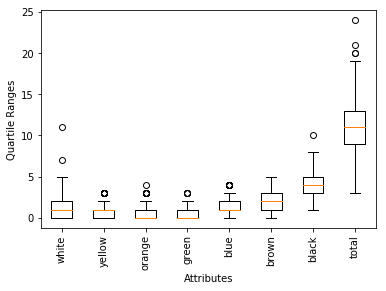

In [46]:
array = features.values[:, :]
plt.boxplot(array)
plt.xticks(list(range(1, len(features.columns) + 1)), list(features.columns), rotation = 'vertical')
plt.xlabel("Attributes")
plt.ylabel("Quartile Ranges")
plt.show()

In [49]:
features_summary

,white,yellow,orange,green,blue,brown,black
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,1.647059,0.794118,0.668067,0.651261,1.424370,2.197479,4.025210
std,1.596876,0.839207,0.858753,0.763223,1.023229,1.242222,1.542436
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,3.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,4.000000
75%,2.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000
max,11.000000,3.000000,4.000000,3.000000,4.000000,5.000000,10.000000


In [50]:
features_normalized = features.copy()
ncols = len(features.columns)

for i in range(ncols): 
    mean = data_summary.iloc[1, i]
    sd = data_summary.iloc[2, i]
    
    features_normalized.iloc[:, i:(i + 1)] = (features_normalized.iloc[:, i:(i + 1)] - mean) /sd

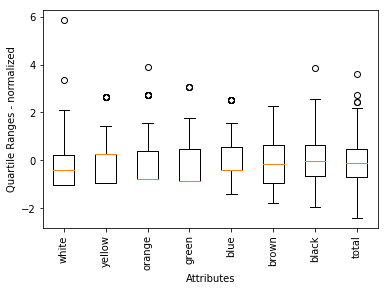

In [51]:
array = features_normalized.values[:, :]
plt.boxplot(array)
plt.xticks(list(range(1, len(features.columns) + 1)), list(features.columns), rotation = 'vertical')
plt.xlabel("Attributes")
plt.ylabel("Quartile Ranges - normalized")
plt.show()

### Propability plots

In [52]:
from scipy import stats

Feature white:


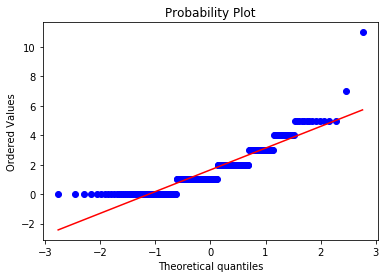

Feature yellow:


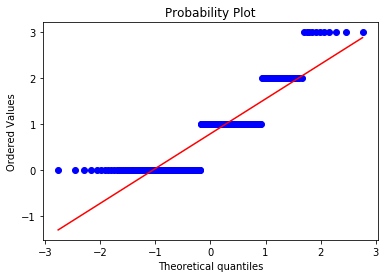

Feature orange:


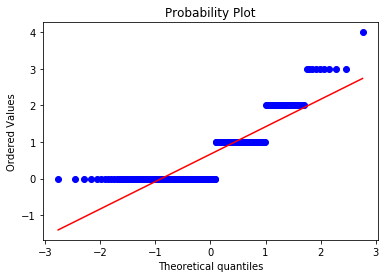

Feature green:


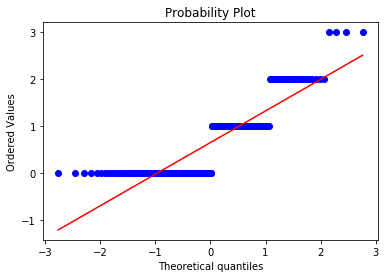

Feature blue:


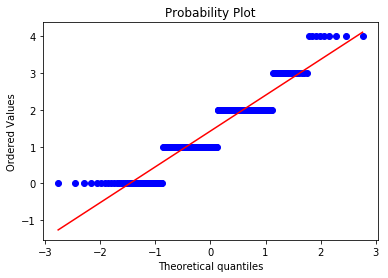

Feature brown:


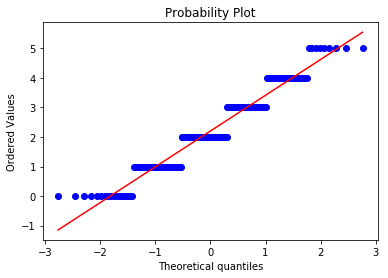

Feature black:


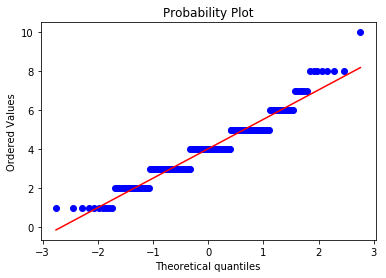

Feature total:


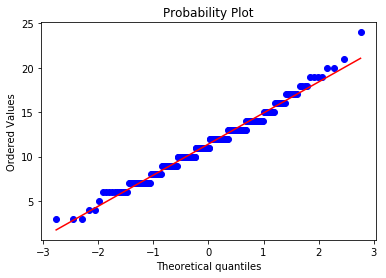

In [54]:
for col in range(len(data_summary)):
    stats.probplot(features.iloc[:,col], dist = "norm", plot = plt)
    print("Feature " + data_summary.columns[col] + ":")
    plt.show()

### Correlation heat map

In [55]:
corMat = pd.DataFrame(data.corr())
print(corMat)

           white    yellow    orange     green      blue     brown     black  \
white   1.000000  0.128165  0.034208  0.050912  0.265066 -0.060434  0.101272   
yellow  0.128165  1.000000 -0.083517 -0.026932  0.062867  0.087735 -0.113322   
orange  0.034208 -0.083517  1.000000 -0.351180  0.069748  0.251563  0.379046   
green   0.050912 -0.026932 -0.351180  1.000000  0.076844 -0.145125 -0.100027   
blue    0.265066  0.062867  0.069748  0.076844  1.000000 -0.172435  0.100131   
brown  -0.060434  0.087735  0.251563 -0.145125 -0.172435  1.000000  0.133924   
black   0.101272 -0.113322  0.379046 -0.100027  0.100131  0.133924  1.000000   
total   0.606500  0.271172  0.440609  0.075465  0.444682  0.386655  0.607076   
label   0.147627  0.254309 -0.195539 -0.006407  0.034534 -0.167285 -0.378344   

           total     label  
white   0.606500  0.147627  
yellow  0.271172  0.254309  
orange  0.440609 -0.195539  
green   0.075465 -0.006407  
blue    0.444682  0.034534  
brown   0.386655 -0.16728

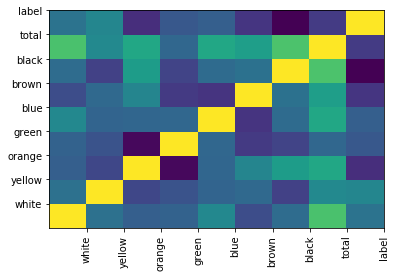

In [56]:
plt.pcolor(corMat)
plt.xticks(list(range(1, len(data_summary.columns) + 1)), list(data_summary.columns), rotation = 'vertical')
plt.yticks(list(range(1, len(data_summary.columns) + 1)), list(data_summary.columns), rotation = 'horizontal')
plt.show()

### Lasso Regression

In [57]:
from sklearn import linear_model

In [58]:
model = linear_model.LassoCV(normalize = True, cv = 10).fit(features, labels)

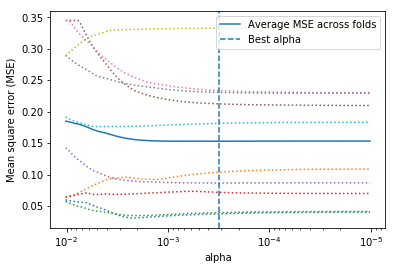

In [59]:
plt.plot(model.alphas_, model.mse_path_, ":")
plt.plot(model.alphas_, model.mse_path_.mean(axis=-1), label = "Average MSE across folds")
plt.axvline(model.alpha_, linestyle = "--", label = "Best alpha")
plt.legend()
plt.semilogx()
ax = plt.gca()
ax.invert_xaxis()
plt.axis("tight")
plt.ylabel("Mean square error (MSE)")
plt.xlabel("alpha")
plt.show()

In [62]:
model.coef_

array([ 0.05947178,  0.08009152, -0.01548613, -0.02532817,  0.        ,
       -0.04940309, -0.13991913, -0.        ])